In [1]:
#MUST RUN
#import code

import pandas as pd
import numpy as np
import math
import random
import collections
import itertools
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

In [2]:
#MUST RUN
#establishes deck of cards

suits = ["s", "h", "d", "c"]
cards = ["2","3","4","5","6","7","8","9","T","J","Q","K","A"]
deck = [cards[i] + suits[j] for j in range(len(suits)) for i in range(len(cards)) ]

In [3]:
#MUST RUN
#establishes functions to determine hand strength

def check_quads(num_counts, numbers_to_values):

    score = 7
    score += numbers_to_values[num_counts.most_common()[0][0]]        
    score += numbers_to_values[num_counts.most_common()[1][0]]/100

    return score

def check_full_house(num_counts, numbers_to_values):

    score = 6
    score += numbers_to_values[num_counts.most_common()[0][0]]
    score += numbers_to_values[num_counts.most_common()[1][0]]/100

    return score

def check_three_kind(num_counts, numbers_to_values):

    score = 3
    score += numbers_to_values[num_counts.most_common()[0][0]]

    singles = sorted([num_counts.most_common()[1][0],num_counts.most_common()[2][0]], reverse=True)

    score += numbers_to_values[singles[0]]/100
    score += numbers_to_values[singles[1]]/100/100   
    
    return score

def check_two_pair(num_counts, numbers_to_values):
    
    score = 2

    doubles = sorted([num_counts.most_common()[0][0],num_counts.most_common()[1][0]], reverse=True)

    score += numbers_to_values[doubles[0]]
    score += numbers_to_values[doubles[1]]/100

    score += numbers_to_values[num_counts.most_common()[2][0]]/100/100
    
    return score

def check_one_pair(num_counts, numbers_to_values):
    
    score = 1
    score += numbers_to_values[num_counts.most_common()[0][0]]

    singles = sorted([num_counts.most_common()[1][0],num_counts.most_common()[2][0],num_counts.most_common()[3][0]], reverse=True)

    score += numbers_to_values[singles[0]]/100
    score += numbers_to_values[singles[1]]/100/100
    score += numbers_to_values[singles[2]]/100/100/100
    
    return score

def check_high_card(magnitude_num, numbers_to_values):

    score = 0

    singles = sorted(magnitude_num, reverse=True)
    
    score += numbers_to_values[singles[0]]
    score += numbers_to_values[singles[1]]/100
    score += numbers_to_values[singles[2]]/100/100
    score += numbers_to_values[singles[3]]/100/100/100
    score += numbers_to_values[singles[4]]/100/100/100/100 
    
    return score

def check_straight(magnitude_num, numbers_to_values):
    
    score = 0
    
    if (len(np.unique(magnitude_num))==5) & (max(magnitude_num)-min(magnitude_num) == 4):
        
        score = 4
        
        score += numbers_to_values[max(magnitude_num)]
        
    elif (len(np.unique(magnitude_num))==5) & (sorted(magnitude_num, reverse=True)==[14, 5, 4, 3, 2]):
        
        score = 4
        
        score += numbers_to_values[5]
        
    return score
    
def check_flush(suits, magnitude_num, numbers_to_values):
    
    if len(np.unique(suits)) == 1:
        
        score = 5
        
        singles = sorted(magnitude_num, reverse=True)
        
        score += numbers_to_values[singles[0]]
        score += numbers_to_values[singles[1]]/100
        score += numbers_to_values[singles[2]]/100/100
        score += numbers_to_values[singles[3]]/100/100/100
        score += numbers_to_values[singles[4]]/100/100/100/100 
        
    else:
        
        score = 0
        
    return score

def calc_five_card_strength(five_cards):
    
    #straight flush: 8
    #four of a kind: 7
    #full house: 6
    #flush: 5
    #straight: 4
    #trips: 3
    #two pair: 2
    #pair: 1
    #high card: 0
    
    #ones digit is hand type
    #tens-hundreds digits are most important card(s)
    #next two digits are second most imporatant card(s), and so one
    
    score = 0
    
    cards_to_numbers = {"2":2, "3":3, "4":4, "5":5, "6":6, "7":7, "8":8, "9":9, "T":10, "J":11, "Q":12, "K":13, "A":14}
    cards_to_values = {"2":.05, "3":.1, "4":.15, "5":.2, "6":.25, "7":.3, "8":.35, "9":.4, "T":.45, "J":.5, "Q":.55, "K":.6, "A":.65}
    numbers_to_values = dict(zip(cards_to_numbers.values(),cards_to_values.values()))
    
    magnitude = [five_cards[i][0] for i in range(len(five_cards))]
    magnitude_num = [cards_to_numbers[magnitude[i]] for i in range(len(magnitude))]
    
    suits = [five_cards[i][1] for i in range(len(five_cards))]
    
    num_counts = collections.Counter(magnitude_num)
    
    #check for quads
    if num_counts.most_common()[0][1] == 4:
        
        score = check_quads(num_counts, numbers_to_values)
    
    #check for full house
    elif (num_counts.most_common()[0][1] == 3) & (num_counts.most_common()[1][1] == 2):
        
        score = check_full_house(num_counts, numbers_to_values)
    
    #check for three of a kind
    elif (num_counts.most_common()[0][1] == 3):
        
        score = check_three_kind(num_counts, numbers_to_values)
    
    #check for two pair
    elif (num_counts.most_common()[0][1] == 2) & (num_counts.most_common()[1][1] == 2):
        
        score = check_two_pair(num_counts, numbers_to_values)
    
    #check for pair
    elif (num_counts.most_common()[0][1] == 2):
        
        score = check_one_pair(num_counts, numbers_to_values)
    
    #check for high card
    else:
        
        score = check_high_card(magnitude_num, numbers_to_values)
    
    straight = check_straight(magnitude_num, numbers_to_values)
    flush = check_flush(suits, magnitude_num, numbers_to_values)
    
    if (flush > 0) & (straight > 0):
        
        score = straight + 4
        
    else:
        
        score = max(score, flush, straight)
    
    return score

def calc_seven_card_strength(hand, board):
    
    all_scores = []
    
    for five_cards in list(itertools.combinations([*hand, *board],5)):
        
        all_scores.append(calc_five_card_strength(list(five_cards)))
        
    return max(all_scores)
    

In [5]:
#MUST RUN
#creates a class to represent a poker board state, with functions that modify itself

class board_state:
    def __init__(self, phase, hand1, hand2, board, mod_deck):
        self.phase = phase
        self.hand1 = hand1
        self.hand2 = hand2
        self.board = board
        self.mod_deck = mod_deck
    
    def show_state(self):
        print('Player 1 hand: ' + str(self.hand1))
        print('Player 2 hand: ' + str(self.hand2))
        print('Board: ' + str(self.board))
    
    def flop(self):
        if self.phase != 0:
            print('error: phase not preflop, cannot execute flop.')
            #error
        elif self.phase == 0:
            self.phase = 1
            self.board = random.sample(self.mod_deck, 3)
            
            self.mod_deck = [self.mod_deck[i] for i in range(len(self.mod_deck)) if self.mod_deck[i] not in self.board]
            
    def turn(self):
        if self.phase != 1:
            print('error: phase not flop, cannot execute turn.')
            #error
        elif self.phase == 1:
            self.phase = 2
            turn = random.sample(self.mod_deck, 1)[0]
            self.board.append(turn)
            
            self.mod_deck.remove(turn)
            
    def river(self):
        if self.phase != 2:
            print('error: phase not turn, cannot execute river.')
            #error
        elif self.phase == 2:
            self.phase = 3
            river = random.sample(self.mod_deck, 1)[0]
            self.board.append(river)
            
            self.mod_deck.remove(river)
            
    def calculate_winner(self):
        
        if self.phase != 3:
            
            print('error: phase not river, cannot calculate winner.')
            
        elif self.phase == 3:
        
            hand1_strength = calc_seven_card_strength(self.board,self.hand1)
            hand2_strength = calc_seven_card_strength(self.board,self.hand2)
            
            if hand1_strength > hand2_strength:

                return 1

            elif hand2_strength > hand1_strength:

                return 2

            else:

                return 0
            
    def all_phases_calculate(self):
        
        self.flop()
        self.turn()
        self.river()
        
        return self.calculate_winner()
        

In [6]:
# MUST RUN
#creates functions that create a board state

def start_game():
    
    hands = random.sample(deck, 4)
    
    hand1 = hands[0:2]
    hand2 = hands[2:4]
    
    mod_deck = [deck[i] for i in range(52) if deck[i] not in hands]
    
    X = board_state(0,hand1,hand2,[],mod_deck)
    
    return X

def start_game_with_hands(hand1, hand2):
    
    mod_deck = [deck[i] for i in range(52) if deck[i] not in [*hand1, *hand2]]
    
    X = board_state(0,hand1,hand2,[],mod_deck)
    
    return X

In [7]:
#MUST RUN
#compares two hands, runs iterations simulations and returns the number of times hand 1 won, hand 2 won, and ties.
#If equity is True, ignores ties

def simulate_hand_fight(hand1, hand2, iterations=1000, equity=True):
    
    results = [0,0,0]
    
    for trial in range(iterations):
        
        game_trial = start_game_with_hands(hand1, hand2)
        
        results[game_trial.all_phases_calculate()] += 1
        
    if equity==True:
        
        results = [results[1]+results[0]/2, results[2]+results[0]/2]
        
    return results

In [8]:
#creates matrix of handfight win probabilities of hands pitted against each other (52*51/2) by (52*51/2)

def create_pf_win_prob_matrix(iters):
    
    num_hands = int(52*51/2)
    
    #converts tuples to lists
    poss_hands = [list(list(itertools.combinations(deck,2))[i]) for i in range(num_hands)]
    hand_nums = np.array(range(num_hands))
    num_to_hand = dict(zip(hand_nums, poss_hands))
    
    surplus_win_probs = np.zeros([num_hands,num_hands])
    
    for hand1_num in tqdm(range(num_hands)):
        
        for hand2_num in tqdm(range(hand1_num)):
            
            hand1 = num_to_hand[hand1_num]
            hand2 = num_to_hand[hand2_num]
            
            surplus_win_prob_p1 = (2*simulate_hand_fight(hand1,hand2, iters, True)[0]/iters-1)
            surplus_win_probs[hand1_num,hand2_num] = surplus_win_prob_p1
            surplus_win_probs[hand2_num,hand1_num] = -surplus_win_prob_p1
    
    return surplus_win_probs

In [9]:
#very complicated code that returns regret for both players after many iterations
#this is what we have to fix (for this specific sim) - i don't know if it's broken though lol
# we assume blocker effects don't exist here

def hu_pf_sim_v2(surplus_win_probs, num_iter = 10000, iters=100):
    
    #set overall parameters
    num_hands = int(52*51/2)
    stacks = 10 
    
    #create general variables/dicts needed later
    poss_hands = [list(list(itertools.combinations(deck,2))[i]) for i in range(num_hands)]
    hand_nums = np.array(range(num_hands))
    num_to_hand = dict(zip(hand_nums, poss_hands))
    

    #create regret matrices; first element is fold, second is shove. We start with both equal to 1 such that each action is 50%
    p1_strats = np.array([[1, 1]] * num_hands).astype(float) #fold, shove
    p2_strats = np.array([[1, 1]] * num_hands).astype(float) #fold, call (conditional on p1 shoving)
    
    #the following code is the optimization and runs num_iter times
    for iter in tqdm(range(num_iter)):
        
        hand1_num, hand2_num = random.sample(list(hand_nums),2)
        hand1 = num_to_hand[hand1_num]
        hand2 = num_to_hand[hand2_num]
        
        #an information set is one hand. we calculate win probability based on p1's hand against all possible hands p2 has, conditional on p2 calling
        #for now, IGNORE BLOCKER EFFECTS
        all_win_prob_p1 = 0
        total_prob_p2_calls = 0
        for hand_i in range(num_hands):
            per_hand_win_prob_p1 = (surplus_win_probs[hand1_num, hand_i]+1)/2
            
            #calc prob p1 bets
            if p2_strats[hand_i, 0]<=0:
                if p2_strats[hand_i, 1]<=0:
                    p2_sim_prob_fold=.5
                else:
                    p2_sim_prob_fold=0
            else:
                if p2_strats[hand_i, 1]<=0:
                    p2_sim_prob_fold=1
                else:
                    p2_sim_prob_fold = p2_strats[hand_i, 0]/sum(p2_strats[hand_i, :])
            
            all_win_prob_p1 = all_win_prob_p1 + (1-p2_sim_prob_fold)*per_hand_win_prob_p1
            total_prob_p2_calls = total_prob_p2_calls + (1-p2_sim_prob_fold)
        
        win_prob_p1 = all_win_prob_p1/total_prob_p2_calls
        
        #this code chunk calculates the expected win probability for player 2 given only their hand. we must condition on whether p1 will bet or not, so given that we face a bet, find our expected WP.
        all_win_prob_p2 = 0
        total_prob_p1_bets = 0
        for hand_i in range(num_hands):
            per_hand_win_prob_p2 = 1-(surplus_win_probs[hand_i, hand2_num]+1)/2
            
            #calc prob p1 bets
            if p1_strats[hand_i, 0]<=0:
                if p1_strats[hand_i, 1]<=0:
                    p1_sim_prob_fold=.5
                else:
                    p1_sim_prob_fold=0
            else:
                if p1_strats[hand_i, 1]<=0:
                    p1_sim_prob_fold=1
                else:
                    p1_sim_prob_fold = p1_strats[hand_i, 0]/sum(p1_strats[hand_i, :])
            
            all_win_prob_p2 = all_win_prob_p2 + (1-p1_sim_prob_fold)*per_hand_win_prob_p2
            total_prob_p1_bets = total_prob_p1_bets + (1-p1_sim_prob_fold)
        
        win_prob_p2 = all_win_prob_p2/total_prob_p1_bets
            
        #we now calculate, based on the regret matrices:
        #from p2's perspective, what is the probability that p1 folds
        #form p1's perspective, what is the probability that p2 folds
        #sim is your guess of the other person's action
        #con is your probability of action
        p1_sim_prob_fold = 0
        p2_sim_prob_fold = 0
        
        for hand_i in range(num_hands):

            if p1_strats[hand_i, 0]<=0:
                if p1_strats[hand_i, 1]<=0:
                    p1_sim_prob_fold+=.5
                else:
                    p1_sim_prob_fold+=0
            else:
                if p1_strats[hand_i, 1]<=0:
                    p1_sim_prob_fold+=1
                else:
                    p1_sim_prob_fold += p1_strats[hand_i, 0]/sum(p1_strats[hand_i, :])
                    
                    
            if p2_strats[hand_i, 0]<=0:
                if p2_strats[hand_i, 1]<=0:
                    p2_sim_prob_fold+=.5
                else:
                    p2_sim_prob_fold+=0
            else:
                if p2_strats[hand_i, 1]<=0:
                    p2_sim_prob_fold+=1
                else:
                    p2_sim_prob_fold += p2_strats[hand_i, 0]/sum(p2_strats[hand_i, :])
                    
        p1_sim_prob_fold = p1_sim_prob_fold/(num_hands)
        p2_sim_prob_fold = p2_sim_prob_fold/(num_hands)
        
        if p2_strats[hand2_num, 0]<=0:
            if p2_strats[hand2_num, 1]<=0:
                p2_con_prob_fold=.5
            else:
                p2_con_prob_fold=0
        else:
            if p2_strats[hand2_num, 1]<=0:
                p2_con_prob_fold=1
            else:
                p2_con_prob_fold = p2_strats[hand2_num, 0]/sum(p2_strats[hand2_num, :])
              
        if p1_strats[hand1_num, 0]<=0:
            if p1_strats[hand1_num, 1]<=0:
                p1_con_prob_fold=.5
            else:
                p1_con_prob_fold=0
        else:
            if p1_strats[hand1_num, 1]<=0:
                p1_con_prob_fold=1
            else:
                p1_con_prob_fold = p1_strats[hand1_num, 0]/sum(p1_strats[hand1_num, :])
        
        #calculate actual payouts for folding and pushing
        p1_actual_payouts = np.array([0, 1.5*p2_sim_prob_fold + ((stacks+.5)*win_prob_p1-(stacks-.5)*(1-win_prob_p1))*(1-p2_sim_prob_fold)])
        p1_mixed_chosen_payout = np.dot([p1_con_prob_fold,(1-p1_con_prob_fold)],p1_actual_payouts)
        p1_regret = p1_actual_payouts-p1_mixed_chosen_payout
        
        #calculate actual payouts for folding and calling
        p2_actual_payouts = np.array([0, ((stacks+1)*(win_prob_p2)-(stacks-1)*(1-win_prob_p2))])*(1-p1_sim_prob_fold)
        p2_mixed_chosen_payout = np.dot([p2_sim_prob_fold,(1-p2_sim_prob_fold)],p2_actual_payouts)
        p2_regret = p2_actual_payouts-p2_mixed_chosen_payout
        
        p1_strats[hand1_num] = (p1_strats[hand1_num] + p1_regret)
        p2_strats[hand2_num] = (p2_strats[hand2_num] + p2_regret)
        
    return p1_strats, p2_strats

In [10]:
#create very approximated win prob matrix

surplus_win_probs_1 = create_pf_win_prob_matrix(1)


  0%|          | 0/1326 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/87 [00:00<?, ?it/s]

  0%|          | 0/88 [00:00<?, ?it/s]

  0%|          | 0/89 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/92 [00:00<?, ?it/s]

  0%|          | 0/93 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

  0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/102 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

  0%|          | 0/104 [00:00<?, ?it/s]

  0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/106 [00:00<?, ?it/s]

  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/111 [00:00<?, ?it/s]

  0%|          | 0/112 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/115 [00:00<?, ?it/s]

  0%|          | 0/116 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/122 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

  0%|          | 0/124 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/126 [00:00<?, ?it/s]

  0%|          | 0/127 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/129 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/133 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

  0%|          | 0/137 [00:00<?, ?it/s]

  0%|          | 0/138 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

  0%|          | 0/141 [00:00<?, ?it/s]

  0%|          | 0/142 [00:00<?, ?it/s]

  0%|          | 0/143 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/145 [00:00<?, ?it/s]

  0%|          | 0/146 [00:00<?, ?it/s]

  0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/148 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/152 [00:00<?, ?it/s]

  0%|          | 0/153 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/155 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/159 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/164 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/166 [00:00<?, ?it/s]

  0%|          | 0/167 [00:00<?, ?it/s]

  0%|          | 0/168 [00:00<?, ?it/s]

  0%|          | 0/169 [00:00<?, ?it/s]

  0%|          | 0/170 [00:00<?, ?it/s]

  0%|          | 0/171 [00:00<?, ?it/s]

  0%|          | 0/172 [00:00<?, ?it/s]

  0%|          | 0/173 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/176 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

  0%|          | 0/178 [00:00<?, ?it/s]

  0%|          | 0/179 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/181 [00:00<?, ?it/s]

  0%|          | 0/182 [00:00<?, ?it/s]

  0%|          | 0/183 [00:00<?, ?it/s]

  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/185 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/187 [00:00<?, ?it/s]

  0%|          | 0/188 [00:00<?, ?it/s]

  0%|          | 0/189 [00:00<?, ?it/s]

  0%|          | 0/190 [00:00<?, ?it/s]

  0%|          | 0/191 [00:00<?, ?it/s]

  0%|          | 0/192 [00:00<?, ?it/s]

  0%|          | 0/193 [00:00<?, ?it/s]

  0%|          | 0/194 [00:00<?, ?it/s]

  0%|          | 0/195 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/197 [00:00<?, ?it/s]

  0%|          | 0/198 [00:00<?, ?it/s]

  0%|          | 0/199 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

  0%|          | 0/202 [00:00<?, ?it/s]

  0%|          | 0/203 [00:00<?, ?it/s]

  0%|          | 0/204 [00:00<?, ?it/s]

  0%|          | 0/205 [00:00<?, ?it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/207 [00:00<?, ?it/s]

  0%|          | 0/208 [00:00<?, ?it/s]

  0%|          | 0/209 [00:00<?, ?it/s]

  0%|          | 0/210 [00:00<?, ?it/s]

  0%|          | 0/211 [00:00<?, ?it/s]

  0%|          | 0/212 [00:00<?, ?it/s]

  0%|          | 0/213 [00:00<?, ?it/s]

  0%|          | 0/214 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/216 [00:00<?, ?it/s]

  0%|          | 0/217 [00:00<?, ?it/s]

  0%|          | 0/218 [00:00<?, ?it/s]

  0%|          | 0/219 [00:00<?, ?it/s]

  0%|          | 0/220 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/222 [00:00<?, ?it/s]

  0%|          | 0/223 [00:00<?, ?it/s]

  0%|          | 0/224 [00:00<?, ?it/s]

  0%|          | 0/225 [00:00<?, ?it/s]

  0%|          | 0/226 [00:00<?, ?it/s]

  0%|          | 0/227 [00:00<?, ?it/s]

  0%|          | 0/228 [00:00<?, ?it/s]

  0%|          | 0/229 [00:00<?, ?it/s]

  0%|          | 0/230 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/232 [00:00<?, ?it/s]

  0%|          | 0/233 [00:00<?, ?it/s]

  0%|          | 0/234 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/236 [00:00<?, ?it/s]

  0%|          | 0/237 [00:00<?, ?it/s]

  0%|          | 0/238 [00:00<?, ?it/s]

  0%|          | 0/239 [00:00<?, ?it/s]

  0%|          | 0/240 [00:00<?, ?it/s]

  0%|          | 0/241 [00:00<?, ?it/s]

  0%|          | 0/242 [00:00<?, ?it/s]

  0%|          | 0/243 [00:00<?, ?it/s]

  0%|          | 0/244 [00:00<?, ?it/s]

  0%|          | 0/245 [00:00<?, ?it/s]

  0%|          | 0/246 [00:00<?, ?it/s]

  0%|          | 0/247 [00:00<?, ?it/s]

  0%|          | 0/248 [00:00<?, ?it/s]

  0%|          | 0/249 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/251 [00:00<?, ?it/s]

  0%|          | 0/252 [00:00<?, ?it/s]

  0%|          | 0/253 [00:00<?, ?it/s]

  0%|          | 0/254 [00:00<?, ?it/s]

  0%|          | 0/255 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

  0%|          | 0/257 [00:00<?, ?it/s]

  0%|          | 0/258 [00:00<?, ?it/s]

  0%|          | 0/259 [00:00<?, ?it/s]

  0%|          | 0/260 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/262 [00:00<?, ?it/s]

  0%|          | 0/263 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/265 [00:00<?, ?it/s]

  0%|          | 0/266 [00:00<?, ?it/s]

  0%|          | 0/267 [00:00<?, ?it/s]

  0%|          | 0/268 [00:00<?, ?it/s]

  0%|          | 0/269 [00:00<?, ?it/s]

  0%|          | 0/270 [00:00<?, ?it/s]

  0%|          | 0/271 [00:00<?, ?it/s]

  0%|          | 0/272 [00:00<?, ?it/s]

  0%|          | 0/273 [00:00<?, ?it/s]

  0%|          | 0/274 [00:00<?, ?it/s]

  0%|          | 0/275 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/277 [00:00<?, ?it/s]

  0%|          | 0/278 [00:00<?, ?it/s]

  0%|          | 0/279 [00:00<?, ?it/s]

  0%|          | 0/280 [00:00<?, ?it/s]

  0%|          | 0/281 [00:00<?, ?it/s]

  0%|          | 0/282 [00:00<?, ?it/s]

  0%|          | 0/283 [00:00<?, ?it/s]

  0%|          | 0/284 [00:00<?, ?it/s]

  0%|          | 0/285 [00:00<?, ?it/s]

  0%|          | 0/286 [00:00<?, ?it/s]

  0%|          | 0/287 [00:00<?, ?it/s]

  0%|          | 0/288 [00:00<?, ?it/s]

  0%|          | 0/289 [00:00<?, ?it/s]

  0%|          | 0/290 [00:00<?, ?it/s]

  0%|          | 0/291 [00:00<?, ?it/s]

  0%|          | 0/292 [00:00<?, ?it/s]

  0%|          | 0/293 [00:00<?, ?it/s]

  0%|          | 0/294 [00:00<?, ?it/s]

  0%|          | 0/295 [00:00<?, ?it/s]

  0%|          | 0/296 [00:00<?, ?it/s]

  0%|          | 0/297 [00:00<?, ?it/s]

  0%|          | 0/298 [00:00<?, ?it/s]

  0%|          | 0/299 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/301 [00:00<?, ?it/s]

  0%|          | 0/302 [00:00<?, ?it/s]

  0%|          | 0/303 [00:00<?, ?it/s]

  0%|          | 0/304 [00:00<?, ?it/s]

  0%|          | 0/305 [00:00<?, ?it/s]

  0%|          | 0/306 [00:00<?, ?it/s]

  0%|          | 0/307 [00:00<?, ?it/s]

  0%|          | 0/308 [00:00<?, ?it/s]

  0%|          | 0/309 [00:00<?, ?it/s]

  0%|          | 0/310 [00:00<?, ?it/s]

  0%|          | 0/311 [00:00<?, ?it/s]

  0%|          | 0/312 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/314 [00:00<?, ?it/s]

  0%|          | 0/315 [00:00<?, ?it/s]

  0%|          | 0/316 [00:00<?, ?it/s]

  0%|          | 0/317 [00:00<?, ?it/s]

  0%|          | 0/318 [00:00<?, ?it/s]

  0%|          | 0/319 [00:00<?, ?it/s]

  0%|          | 0/320 [00:00<?, ?it/s]

  0%|          | 0/321 [00:00<?, ?it/s]

  0%|          | 0/322 [00:00<?, ?it/s]

  0%|          | 0/323 [00:00<?, ?it/s]

  0%|          | 0/324 [00:00<?, ?it/s]

  0%|          | 0/325 [00:00<?, ?it/s]

  0%|          | 0/326 [00:00<?, ?it/s]

  0%|          | 0/327 [00:00<?, ?it/s]

  0%|          | 0/328 [00:00<?, ?it/s]

  0%|          | 0/329 [00:00<?, ?it/s]

  0%|          | 0/330 [00:00<?, ?it/s]

  0%|          | 0/331 [00:00<?, ?it/s]

  0%|          | 0/332 [00:00<?, ?it/s]

  0%|          | 0/333 [00:00<?, ?it/s]

  0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/335 [00:00<?, ?it/s]

  0%|          | 0/336 [00:00<?, ?it/s]

  0%|          | 0/337 [00:00<?, ?it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/340 [00:00<?, ?it/s]

  0%|          | 0/341 [00:00<?, ?it/s]

  0%|          | 0/342 [00:00<?, ?it/s]

  0%|          | 0/343 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/345 [00:00<?, ?it/s]

  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/347 [00:00<?, ?it/s]

  0%|          | 0/348 [00:00<?, ?it/s]

  0%|          | 0/349 [00:00<?, ?it/s]

  0%|          | 0/350 [00:00<?, ?it/s]

  0%|          | 0/351 [00:00<?, ?it/s]

  0%|          | 0/352 [00:00<?, ?it/s]

  0%|          | 0/353 [00:00<?, ?it/s]

  0%|          | 0/354 [00:00<?, ?it/s]

  0%|          | 0/355 [00:00<?, ?it/s]

  0%|          | 0/356 [00:00<?, ?it/s]

  0%|          | 0/357 [00:00<?, ?it/s]

  0%|          | 0/358 [00:00<?, ?it/s]

  0%|          | 0/359 [00:00<?, ?it/s]

  0%|          | 0/360 [00:00<?, ?it/s]

  0%|          | 0/361 [00:00<?, ?it/s]

  0%|          | 0/362 [00:00<?, ?it/s]

  0%|          | 0/363 [00:00<?, ?it/s]

  0%|          | 0/364 [00:00<?, ?it/s]

  0%|          | 0/365 [00:00<?, ?it/s]

  0%|          | 0/366 [00:00<?, ?it/s]

  0%|          | 0/367 [00:00<?, ?it/s]

  0%|          | 0/368 [00:00<?, ?it/s]

  0%|          | 0/369 [00:00<?, ?it/s]

  0%|          | 0/370 [00:00<?, ?it/s]

  0%|          | 0/371 [00:00<?, ?it/s]

  0%|          | 0/372 [00:00<?, ?it/s]

  0%|          | 0/373 [00:00<?, ?it/s]

  0%|          | 0/374 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

  0%|          | 0/376 [00:00<?, ?it/s]

  0%|          | 0/377 [00:00<?, ?it/s]

  0%|          | 0/378 [00:00<?, ?it/s]

  0%|          | 0/379 [00:00<?, ?it/s]

  0%|          | 0/380 [00:00<?, ?it/s]

  0%|          | 0/381 [00:00<?, ?it/s]

  0%|          | 0/382 [00:00<?, ?it/s]

  0%|          | 0/383 [00:00<?, ?it/s]

  0%|          | 0/384 [00:00<?, ?it/s]

  0%|          | 0/385 [00:00<?, ?it/s]

  0%|          | 0/386 [00:00<?, ?it/s]

  0%|          | 0/387 [00:00<?, ?it/s]

  0%|          | 0/388 [00:00<?, ?it/s]

  0%|          | 0/389 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/392 [00:00<?, ?it/s]

  0%|          | 0/393 [00:00<?, ?it/s]

  0%|          | 0/394 [00:00<?, ?it/s]

  0%|          | 0/395 [00:00<?, ?it/s]

  0%|          | 0/396 [00:00<?, ?it/s]

  0%|          | 0/397 [00:00<?, ?it/s]

  0%|          | 0/398 [00:00<?, ?it/s]

  0%|          | 0/399 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

  0%|          | 0/402 [00:00<?, ?it/s]

  0%|          | 0/403 [00:00<?, ?it/s]

  0%|          | 0/404 [00:00<?, ?it/s]

  0%|          | 0/405 [00:00<?, ?it/s]

  0%|          | 0/406 [00:00<?, ?it/s]

  0%|          | 0/407 [00:00<?, ?it/s]

  0%|          | 0/408 [00:00<?, ?it/s]

  0%|          | 0/409 [00:00<?, ?it/s]

  0%|          | 0/410 [00:00<?, ?it/s]

  0%|          | 0/411 [00:00<?, ?it/s]

  0%|          | 0/412 [00:00<?, ?it/s]

  0%|          | 0/413 [00:00<?, ?it/s]

  0%|          | 0/414 [00:00<?, ?it/s]

  0%|          | 0/415 [00:00<?, ?it/s]

  0%|          | 0/416 [00:00<?, ?it/s]

  0%|          | 0/417 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/419 [00:00<?, ?it/s]

  0%|          | 0/420 [00:00<?, ?it/s]

  0%|          | 0/421 [00:00<?, ?it/s]

  0%|          | 0/422 [00:00<?, ?it/s]

  0%|          | 0/423 [00:00<?, ?it/s]

  0%|          | 0/424 [00:00<?, ?it/s]

  0%|          | 0/425 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

  0%|          | 0/427 [00:00<?, ?it/s]

  0%|          | 0/428 [00:00<?, ?it/s]

  0%|          | 0/429 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/431 [00:00<?, ?it/s]

  0%|          | 0/432 [00:00<?, ?it/s]

  0%|          | 0/433 [00:00<?, ?it/s]

  0%|          | 0/434 [00:00<?, ?it/s]

  0%|          | 0/435 [00:00<?, ?it/s]

  0%|          | 0/436 [00:00<?, ?it/s]

  0%|          | 0/437 [00:00<?, ?it/s]

  0%|          | 0/438 [00:00<?, ?it/s]

  0%|          | 0/439 [00:00<?, ?it/s]

  0%|          | 0/440 [00:00<?, ?it/s]

  0%|          | 0/441 [00:00<?, ?it/s]

  0%|          | 0/442 [00:00<?, ?it/s]

  0%|          | 0/443 [00:00<?, ?it/s]

  0%|          | 0/444 [00:00<?, ?it/s]

  0%|          | 0/445 [00:00<?, ?it/s]

  0%|          | 0/446 [00:00<?, ?it/s]

  0%|          | 0/447 [00:00<?, ?it/s]

  0%|          | 0/448 [00:00<?, ?it/s]

  0%|          | 0/449 [00:00<?, ?it/s]

  0%|          | 0/450 [00:00<?, ?it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

  0%|          | 0/452 [00:00<?, ?it/s]

  0%|          | 0/453 [00:00<?, ?it/s]

  0%|          | 0/454 [00:00<?, ?it/s]

  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/456 [00:00<?, ?it/s]

  0%|          | 0/457 [00:00<?, ?it/s]

  0%|          | 0/458 [00:00<?, ?it/s]

  0%|          | 0/459 [00:00<?, ?it/s]

  0%|          | 0/460 [00:00<?, ?it/s]

  0%|          | 0/461 [00:00<?, ?it/s]

  0%|          | 0/462 [00:00<?, ?it/s]

  0%|          | 0/463 [00:00<?, ?it/s]

  0%|          | 0/464 [00:00<?, ?it/s]

  0%|          | 0/465 [00:00<?, ?it/s]

  0%|          | 0/466 [00:00<?, ?it/s]

  0%|          | 0/467 [00:00<?, ?it/s]

  0%|          | 0/468 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/470 [00:00<?, ?it/s]

  0%|          | 0/471 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/473 [00:00<?, ?it/s]

  0%|          | 0/474 [00:00<?, ?it/s]

  0%|          | 0/475 [00:00<?, ?it/s]

  0%|          | 0/476 [00:00<?, ?it/s]

  0%|          | 0/477 [00:00<?, ?it/s]

  0%|          | 0/478 [00:00<?, ?it/s]

  0%|          | 0/479 [00:00<?, ?it/s]

  0%|          | 0/480 [00:00<?, ?it/s]

  0%|          | 0/481 [00:00<?, ?it/s]

  0%|          | 0/482 [00:00<?, ?it/s]

  0%|          | 0/483 [00:00<?, ?it/s]

  0%|          | 0/484 [00:00<?, ?it/s]

  0%|          | 0/485 [00:00<?, ?it/s]

  0%|          | 0/486 [00:00<?, ?it/s]

  0%|          | 0/487 [00:00<?, ?it/s]

  0%|          | 0/488 [00:00<?, ?it/s]

  0%|          | 0/489 [00:00<?, ?it/s]

  0%|          | 0/490 [00:00<?, ?it/s]

  0%|          | 0/491 [00:00<?, ?it/s]

  0%|          | 0/492 [00:00<?, ?it/s]

  0%|          | 0/493 [00:00<?, ?it/s]

  0%|          | 0/494 [00:00<?, ?it/s]

  0%|          | 0/495 [00:00<?, ?it/s]

  0%|          | 0/496 [00:00<?, ?it/s]

  0%|          | 0/497 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

  0%|          | 0/499 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/502 [00:00<?, ?it/s]

  0%|          | 0/503 [00:00<?, ?it/s]

  0%|          | 0/504 [00:00<?, ?it/s]

  0%|          | 0/505 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/507 [00:00<?, ?it/s]

  0%|          | 0/508 [00:00<?, ?it/s]

  0%|          | 0/509 [00:00<?, ?it/s]

  0%|          | 0/510 [00:00<?, ?it/s]

  0%|          | 0/511 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]

  0%|          | 0/513 [00:00<?, ?it/s]

  0%|          | 0/514 [00:00<?, ?it/s]

  0%|          | 0/515 [00:00<?, ?it/s]

  0%|          | 0/516 [00:00<?, ?it/s]

  0%|          | 0/517 [00:00<?, ?it/s]

  0%|          | 0/518 [00:00<?, ?it/s]

  0%|          | 0/519 [00:00<?, ?it/s]

  0%|          | 0/520 [00:00<?, ?it/s]

  0%|          | 0/521 [00:00<?, ?it/s]

  0%|          | 0/522 [00:00<?, ?it/s]

  0%|          | 0/523 [00:00<?, ?it/s]

  0%|          | 0/524 [00:00<?, ?it/s]

  0%|          | 0/525 [00:00<?, ?it/s]

  0%|          | 0/526 [00:00<?, ?it/s]

  0%|          | 0/527 [00:00<?, ?it/s]

  0%|          | 0/528 [00:00<?, ?it/s]

  0%|          | 0/529 [00:00<?, ?it/s]

  0%|          | 0/530 [00:00<?, ?it/s]

  0%|          | 0/531 [00:00<?, ?it/s]

  0%|          | 0/532 [00:00<?, ?it/s]

  0%|          | 0/533 [00:00<?, ?it/s]

  0%|          | 0/534 [00:00<?, ?it/s]

  0%|          | 0/535 [00:00<?, ?it/s]

  0%|          | 0/536 [00:00<?, ?it/s]

  0%|          | 0/537 [00:00<?, ?it/s]

  0%|          | 0/538 [00:00<?, ?it/s]

  0%|          | 0/539 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/542 [00:00<?, ?it/s]

  0%|          | 0/543 [00:00<?, ?it/s]

  0%|          | 0/544 [00:00<?, ?it/s]

  0%|          | 0/545 [00:00<?, ?it/s]

  0%|          | 0/546 [00:00<?, ?it/s]

  0%|          | 0/547 [00:00<?, ?it/s]

  0%|          | 0/548 [00:00<?, ?it/s]

  0%|          | 0/549 [00:00<?, ?it/s]

  0%|          | 0/550 [00:00<?, ?it/s]

  0%|          | 0/551 [00:00<?, ?it/s]

  0%|          | 0/552 [00:00<?, ?it/s]

  0%|          | 0/553 [00:00<?, ?it/s]

  0%|          | 0/554 [00:00<?, ?it/s]

  0%|          | 0/555 [00:00<?, ?it/s]

  0%|          | 0/556 [00:00<?, ?it/s]

  0%|          | 0/557 [00:00<?, ?it/s]

  0%|          | 0/558 [00:00<?, ?it/s]

  0%|          | 0/559 [00:00<?, ?it/s]

  0%|          | 0/560 [00:00<?, ?it/s]

  0%|          | 0/561 [00:00<?, ?it/s]

  0%|          | 0/562 [00:00<?, ?it/s]

  0%|          | 0/563 [00:00<?, ?it/s]

  0%|          | 0/564 [00:00<?, ?it/s]

  0%|          | 0/565 [00:00<?, ?it/s]

  0%|          | 0/566 [00:00<?, ?it/s]

  0%|          | 0/567 [00:00<?, ?it/s]

  0%|          | 0/568 [00:00<?, ?it/s]

  0%|          | 0/569 [00:00<?, ?it/s]

  0%|          | 0/570 [00:00<?, ?it/s]

  0%|          | 0/571 [00:00<?, ?it/s]

  0%|          | 0/572 [00:00<?, ?it/s]

  0%|          | 0/573 [00:00<?, ?it/s]

  0%|          | 0/574 [00:00<?, ?it/s]

  0%|          | 0/575 [00:00<?, ?it/s]

  0%|          | 0/576 [00:00<?, ?it/s]

  0%|          | 0/577 [00:00<?, ?it/s]

  0%|          | 0/578 [00:00<?, ?it/s]

  0%|          | 0/579 [00:00<?, ?it/s]

  0%|          | 0/580 [00:00<?, ?it/s]

  0%|          | 0/581 [00:00<?, ?it/s]

  0%|          | 0/582 [00:00<?, ?it/s]

  0%|          | 0/583 [00:00<?, ?it/s]

  0%|          | 0/584 [00:00<?, ?it/s]

  0%|          | 0/585 [00:00<?, ?it/s]

  0%|          | 0/586 [00:00<?, ?it/s]

  0%|          | 0/587 [00:00<?, ?it/s]

  0%|          | 0/588 [00:00<?, ?it/s]

  0%|          | 0/589 [00:00<?, ?it/s]

  0%|          | 0/590 [00:00<?, ?it/s]

  0%|          | 0/591 [00:00<?, ?it/s]

  0%|          | 0/592 [00:00<?, ?it/s]

  0%|          | 0/593 [00:00<?, ?it/s]

  0%|          | 0/594 [00:00<?, ?it/s]

  0%|          | 0/595 [00:00<?, ?it/s]

  0%|          | 0/596 [00:00<?, ?it/s]

  0%|          | 0/597 [00:00<?, ?it/s]

  0%|          | 0/598 [00:00<?, ?it/s]

  0%|          | 0/599 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/601 [00:00<?, ?it/s]

  0%|          | 0/602 [00:00<?, ?it/s]

  0%|          | 0/603 [00:00<?, ?it/s]

  0%|          | 0/604 [00:00<?, ?it/s]

  0%|          | 0/605 [00:00<?, ?it/s]

  0%|          | 0/606 [00:00<?, ?it/s]

  0%|          | 0/607 [00:00<?, ?it/s]

  0%|          | 0/608 [00:00<?, ?it/s]

  0%|          | 0/609 [00:00<?, ?it/s]

  0%|          | 0/610 [00:00<?, ?it/s]

  0%|          | 0/611 [00:00<?, ?it/s]

  0%|          | 0/612 [00:00<?, ?it/s]

  0%|          | 0/613 [00:00<?, ?it/s]

  0%|          | 0/614 [00:00<?, ?it/s]

  0%|          | 0/615 [00:00<?, ?it/s]

  0%|          | 0/616 [00:00<?, ?it/s]

  0%|          | 0/617 [00:00<?, ?it/s]

  0%|          | 0/618 [00:00<?, ?it/s]

  0%|          | 0/619 [00:00<?, ?it/s]

  0%|          | 0/620 [00:00<?, ?it/s]

  0%|          | 0/621 [00:00<?, ?it/s]

  0%|          | 0/622 [00:00<?, ?it/s]

  0%|          | 0/623 [00:00<?, ?it/s]

  0%|          | 0/624 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

  0%|          | 0/626 [00:00<?, ?it/s]

  0%|          | 0/627 [00:00<?, ?it/s]

  0%|          | 0/628 [00:00<?, ?it/s]

  0%|          | 0/629 [00:00<?, ?it/s]

  0%|          | 0/630 [00:00<?, ?it/s]

  0%|          | 0/631 [00:00<?, ?it/s]

  0%|          | 0/632 [00:00<?, ?it/s]

  0%|          | 0/633 [00:00<?, ?it/s]

  0%|          | 0/634 [00:00<?, ?it/s]

  0%|          | 0/635 [00:00<?, ?it/s]

  0%|          | 0/636 [00:00<?, ?it/s]

  0%|          | 0/637 [00:00<?, ?it/s]

  0%|          | 0/638 [00:00<?, ?it/s]

  0%|          | 0/639 [00:00<?, ?it/s]

  0%|          | 0/640 [00:00<?, ?it/s]

  0%|          | 0/641 [00:00<?, ?it/s]

  0%|          | 0/642 [00:00<?, ?it/s]

  0%|          | 0/643 [00:00<?, ?it/s]

  0%|          | 0/644 [00:00<?, ?it/s]

  0%|          | 0/645 [00:00<?, ?it/s]

  0%|          | 0/646 [00:00<?, ?it/s]

  0%|          | 0/647 [00:00<?, ?it/s]

  0%|          | 0/648 [00:00<?, ?it/s]

  0%|          | 0/649 [00:00<?, ?it/s]

  0%|          | 0/650 [00:00<?, ?it/s]

  0%|          | 0/651 [00:00<?, ?it/s]

  0%|          | 0/652 [00:00<?, ?it/s]

  0%|          | 0/653 [00:00<?, ?it/s]

  0%|          | 0/654 [00:00<?, ?it/s]

  0%|          | 0/655 [00:00<?, ?it/s]

  0%|          | 0/656 [00:00<?, ?it/s]

  0%|          | 0/657 [00:00<?, ?it/s]

  0%|          | 0/658 [00:00<?, ?it/s]

  0%|          | 0/659 [00:00<?, ?it/s]

  0%|          | 0/660 [00:00<?, ?it/s]

  0%|          | 0/661 [00:00<?, ?it/s]

  0%|          | 0/662 [00:00<?, ?it/s]

  0%|          | 0/663 [00:00<?, ?it/s]

  0%|          | 0/664 [00:00<?, ?it/s]

  0%|          | 0/665 [00:00<?, ?it/s]

  0%|          | 0/666 [00:00<?, ?it/s]

  0%|          | 0/667 [00:00<?, ?it/s]

  0%|          | 0/668 [00:00<?, ?it/s]

  0%|          | 0/669 [00:00<?, ?it/s]

  0%|          | 0/670 [00:00<?, ?it/s]

  0%|          | 0/671 [00:00<?, ?it/s]

  0%|          | 0/672 [00:00<?, ?it/s]

  0%|          | 0/673 [00:00<?, ?it/s]

  0%|          | 0/674 [00:00<?, ?it/s]

  0%|          | 0/675 [00:00<?, ?it/s]

  0%|          | 0/676 [00:00<?, ?it/s]

  0%|          | 0/677 [00:00<?, ?it/s]

  0%|          | 0/678 [00:00<?, ?it/s]

  0%|          | 0/679 [00:00<?, ?it/s]

  0%|          | 0/680 [00:00<?, ?it/s]

  0%|          | 0/681 [00:00<?, ?it/s]

  0%|          | 0/682 [00:00<?, ?it/s]

  0%|          | 0/683 [00:00<?, ?it/s]

  0%|          | 0/684 [00:00<?, ?it/s]

  0%|          | 0/685 [00:00<?, ?it/s]

  0%|          | 0/686 [00:00<?, ?it/s]

  0%|          | 0/687 [00:00<?, ?it/s]

  0%|          | 0/688 [00:00<?, ?it/s]

  0%|          | 0/689 [00:00<?, ?it/s]

  0%|          | 0/690 [00:00<?, ?it/s]

  0%|          | 0/691 [00:00<?, ?it/s]

  0%|          | 0/692 [00:00<?, ?it/s]

  0%|          | 0/693 [00:00<?, ?it/s]

  0%|          | 0/694 [00:00<?, ?it/s]

  0%|          | 0/695 [00:00<?, ?it/s]

  0%|          | 0/696 [00:00<?, ?it/s]

  0%|          | 0/697 [00:00<?, ?it/s]

  0%|          | 0/698 [00:00<?, ?it/s]

  0%|          | 0/699 [00:00<?, ?it/s]

  0%|          | 0/700 [00:00<?, ?it/s]

  0%|          | 0/701 [00:00<?, ?it/s]

  0%|          | 0/702 [00:00<?, ?it/s]

  0%|          | 0/703 [00:00<?, ?it/s]

  0%|          | 0/704 [00:00<?, ?it/s]

  0%|          | 0/705 [00:00<?, ?it/s]

  0%|          | 0/706 [00:00<?, ?it/s]

  0%|          | 0/707 [00:00<?, ?it/s]

  0%|          | 0/708 [00:00<?, ?it/s]

  0%|          | 0/709 [00:00<?, ?it/s]

  0%|          | 0/710 [00:00<?, ?it/s]

  0%|          | 0/711 [00:00<?, ?it/s]

  0%|          | 0/712 [00:00<?, ?it/s]

  0%|          | 0/713 [00:00<?, ?it/s]

  0%|          | 0/714 [00:00<?, ?it/s]

  0%|          | 0/715 [00:00<?, ?it/s]

  0%|          | 0/716 [00:00<?, ?it/s]

  0%|          | 0/717 [00:00<?, ?it/s]

  0%|          | 0/718 [00:00<?, ?it/s]

  0%|          | 0/719 [00:00<?, ?it/s]

  0%|          | 0/720 [00:00<?, ?it/s]

  0%|          | 0/721 [00:00<?, ?it/s]

  0%|          | 0/722 [00:00<?, ?it/s]

  0%|          | 0/723 [00:00<?, ?it/s]

  0%|          | 0/724 [00:00<?, ?it/s]

  0%|          | 0/725 [00:00<?, ?it/s]

  0%|          | 0/726 [00:00<?, ?it/s]

  0%|          | 0/727 [00:00<?, ?it/s]

  0%|          | 0/728 [00:00<?, ?it/s]

  0%|          | 0/729 [00:00<?, ?it/s]

  0%|          | 0/730 [00:00<?, ?it/s]

  0%|          | 0/731 [00:00<?, ?it/s]

  0%|          | 0/732 [00:00<?, ?it/s]

  0%|          | 0/733 [00:00<?, ?it/s]

  0%|          | 0/734 [00:00<?, ?it/s]

  0%|          | 0/735 [00:00<?, ?it/s]

  0%|          | 0/736 [00:00<?, ?it/s]

  0%|          | 0/737 [00:00<?, ?it/s]

  0%|          | 0/738 [00:00<?, ?it/s]

  0%|          | 0/739 [00:00<?, ?it/s]

  0%|          | 0/740 [00:00<?, ?it/s]

  0%|          | 0/741 [00:00<?, ?it/s]

  0%|          | 0/742 [00:00<?, ?it/s]

  0%|          | 0/743 [00:00<?, ?it/s]

  0%|          | 0/744 [00:00<?, ?it/s]

  0%|          | 0/745 [00:00<?, ?it/s]

  0%|          | 0/746 [00:00<?, ?it/s]

  0%|          | 0/747 [00:00<?, ?it/s]

  0%|          | 0/748 [00:00<?, ?it/s]

  0%|          | 0/749 [00:00<?, ?it/s]

  0%|          | 0/750 [00:00<?, ?it/s]

  0%|          | 0/751 [00:00<?, ?it/s]

  0%|          | 0/752 [00:00<?, ?it/s]

  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/754 [00:00<?, ?it/s]

  0%|          | 0/755 [00:00<?, ?it/s]

  0%|          | 0/756 [00:00<?, ?it/s]

  0%|          | 0/757 [00:00<?, ?it/s]

  0%|          | 0/758 [00:00<?, ?it/s]

  0%|          | 0/759 [00:00<?, ?it/s]

  0%|          | 0/760 [00:00<?, ?it/s]

  0%|          | 0/761 [00:00<?, ?it/s]

  0%|          | 0/762 [00:00<?, ?it/s]

  0%|          | 0/763 [00:00<?, ?it/s]

  0%|          | 0/764 [00:00<?, ?it/s]

  0%|          | 0/765 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/767 [00:00<?, ?it/s]

  0%|          | 0/768 [00:00<?, ?it/s]

  0%|          | 0/769 [00:00<?, ?it/s]

  0%|          | 0/770 [00:00<?, ?it/s]

  0%|          | 0/771 [00:00<?, ?it/s]

  0%|          | 0/772 [00:00<?, ?it/s]

  0%|          | 0/773 [00:00<?, ?it/s]

  0%|          | 0/774 [00:00<?, ?it/s]

  0%|          | 0/775 [00:00<?, ?it/s]

  0%|          | 0/776 [00:00<?, ?it/s]

  0%|          | 0/777 [00:00<?, ?it/s]

  0%|          | 0/778 [00:00<?, ?it/s]

  0%|          | 0/779 [00:00<?, ?it/s]

  0%|          | 0/780 [00:00<?, ?it/s]

  0%|          | 0/781 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/783 [00:00<?, ?it/s]

  0%|          | 0/784 [00:00<?, ?it/s]

  0%|          | 0/785 [00:00<?, ?it/s]

  0%|          | 0/786 [00:00<?, ?it/s]

  0%|          | 0/787 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/789 [00:00<?, ?it/s]

  0%|          | 0/790 [00:00<?, ?it/s]

  0%|          | 0/791 [00:00<?, ?it/s]

  0%|          | 0/792 [00:00<?, ?it/s]

  0%|          | 0/793 [00:00<?, ?it/s]

  0%|          | 0/794 [00:00<?, ?it/s]

  0%|          | 0/795 [00:00<?, ?it/s]

  0%|          | 0/796 [00:00<?, ?it/s]

  0%|          | 0/797 [00:00<?, ?it/s]

  0%|          | 0/798 [00:00<?, ?it/s]

  0%|          | 0/799 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/801 [00:00<?, ?it/s]

  0%|          | 0/802 [00:00<?, ?it/s]

  0%|          | 0/803 [00:00<?, ?it/s]

  0%|          | 0/804 [00:00<?, ?it/s]

  0%|          | 0/805 [00:00<?, ?it/s]

  0%|          | 0/806 [00:00<?, ?it/s]

  0%|          | 0/807 [00:00<?, ?it/s]

  0%|          | 0/808 [00:00<?, ?it/s]

  0%|          | 0/809 [00:00<?, ?it/s]

  0%|          | 0/810 [00:00<?, ?it/s]

  0%|          | 0/811 [00:00<?, ?it/s]

  0%|          | 0/812 [00:00<?, ?it/s]

  0%|          | 0/813 [00:00<?, ?it/s]

  0%|          | 0/814 [00:00<?, ?it/s]

  0%|          | 0/815 [00:00<?, ?it/s]

  0%|          | 0/816 [00:00<?, ?it/s]

  0%|          | 0/817 [00:00<?, ?it/s]

  0%|          | 0/818 [00:00<?, ?it/s]

  0%|          | 0/819 [00:00<?, ?it/s]

  0%|          | 0/820 [00:00<?, ?it/s]

  0%|          | 0/821 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

  0%|          | 0/823 [00:00<?, ?it/s]

  0%|          | 0/824 [00:00<?, ?it/s]

  0%|          | 0/825 [00:00<?, ?it/s]

  0%|          | 0/826 [00:00<?, ?it/s]

  0%|          | 0/827 [00:00<?, ?it/s]

  0%|          | 0/828 [00:00<?, ?it/s]

  0%|          | 0/829 [00:00<?, ?it/s]

  0%|          | 0/830 [00:00<?, ?it/s]

  0%|          | 0/831 [00:00<?, ?it/s]

  0%|          | 0/832 [00:00<?, ?it/s]

  0%|          | 0/833 [00:00<?, ?it/s]

  0%|          | 0/834 [00:00<?, ?it/s]

  0%|          | 0/835 [00:00<?, ?it/s]

  0%|          | 0/836 [00:00<?, ?it/s]

  0%|          | 0/837 [00:00<?, ?it/s]

  0%|          | 0/838 [00:00<?, ?it/s]

  0%|          | 0/839 [00:00<?, ?it/s]

  0%|          | 0/840 [00:00<?, ?it/s]

  0%|          | 0/841 [00:00<?, ?it/s]

  0%|          | 0/842 [00:00<?, ?it/s]

  0%|          | 0/843 [00:00<?, ?it/s]

  0%|          | 0/844 [00:00<?, ?it/s]

  0%|          | 0/845 [00:00<?, ?it/s]

  0%|          | 0/846 [00:00<?, ?it/s]

  0%|          | 0/847 [00:00<?, ?it/s]

  0%|          | 0/848 [00:00<?, ?it/s]

  0%|          | 0/849 [00:00<?, ?it/s]

  0%|          | 0/850 [00:00<?, ?it/s]

  0%|          | 0/851 [00:00<?, ?it/s]

  0%|          | 0/852 [00:00<?, ?it/s]

  0%|          | 0/853 [00:00<?, ?it/s]

  0%|          | 0/854 [00:00<?, ?it/s]

  0%|          | 0/855 [00:00<?, ?it/s]

  0%|          | 0/856 [00:00<?, ?it/s]

  0%|          | 0/857 [00:00<?, ?it/s]

  0%|          | 0/858 [00:00<?, ?it/s]

  0%|          | 0/859 [00:00<?, ?it/s]

  0%|          | 0/860 [00:00<?, ?it/s]

  0%|          | 0/861 [00:00<?, ?it/s]

  0%|          | 0/862 [00:00<?, ?it/s]

  0%|          | 0/863 [00:00<?, ?it/s]

  0%|          | 0/864 [00:00<?, ?it/s]

  0%|          | 0/865 [00:00<?, ?it/s]

  0%|          | 0/866 [00:00<?, ?it/s]

  0%|          | 0/867 [00:00<?, ?it/s]

  0%|          | 0/868 [00:00<?, ?it/s]

  0%|          | 0/869 [00:00<?, ?it/s]

  0%|          | 0/870 [00:00<?, ?it/s]

  0%|          | 0/871 [00:00<?, ?it/s]

  0%|          | 0/872 [00:00<?, ?it/s]

  0%|          | 0/873 [00:00<?, ?it/s]

  0%|          | 0/874 [00:00<?, ?it/s]

  0%|          | 0/875 [00:00<?, ?it/s]

  0%|          | 0/876 [00:00<?, ?it/s]

  0%|          | 0/877 [00:00<?, ?it/s]

  0%|          | 0/878 [00:00<?, ?it/s]

  0%|          | 0/879 [00:00<?, ?it/s]

  0%|          | 0/880 [00:00<?, ?it/s]

  0%|          | 0/881 [00:00<?, ?it/s]

  0%|          | 0/882 [00:00<?, ?it/s]

  0%|          | 0/883 [00:00<?, ?it/s]

  0%|          | 0/884 [00:00<?, ?it/s]

  0%|          | 0/885 [00:00<?, ?it/s]

  0%|          | 0/886 [00:00<?, ?it/s]

  0%|          | 0/887 [00:00<?, ?it/s]

  0%|          | 0/888 [00:00<?, ?it/s]

  0%|          | 0/889 [00:00<?, ?it/s]

  0%|          | 0/890 [00:00<?, ?it/s]

  0%|          | 0/891 [00:00<?, ?it/s]

  0%|          | 0/892 [00:00<?, ?it/s]

  0%|          | 0/893 [00:00<?, ?it/s]

  0%|          | 0/894 [00:00<?, ?it/s]

  0%|          | 0/895 [00:00<?, ?it/s]

  0%|          | 0/896 [00:00<?, ?it/s]

  0%|          | 0/897 [00:00<?, ?it/s]

  0%|          | 0/898 [00:00<?, ?it/s]

  0%|          | 0/899 [00:00<?, ?it/s]

  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/901 [00:00<?, ?it/s]

  0%|          | 0/902 [00:00<?, ?it/s]

  0%|          | 0/903 [00:00<?, ?it/s]

  0%|          | 0/904 [00:00<?, ?it/s]

  0%|          | 0/905 [00:00<?, ?it/s]

  0%|          | 0/906 [00:00<?, ?it/s]

  0%|          | 0/907 [00:00<?, ?it/s]

  0%|          | 0/908 [00:00<?, ?it/s]

  0%|          | 0/909 [00:00<?, ?it/s]

  0%|          | 0/910 [00:00<?, ?it/s]

  0%|          | 0/911 [00:00<?, ?it/s]

  0%|          | 0/912 [00:00<?, ?it/s]

  0%|          | 0/913 [00:00<?, ?it/s]

  0%|          | 0/914 [00:00<?, ?it/s]

  0%|          | 0/915 [00:00<?, ?it/s]

  0%|          | 0/916 [00:00<?, ?it/s]

  0%|          | 0/917 [00:00<?, ?it/s]

  0%|          | 0/918 [00:00<?, ?it/s]

  0%|          | 0/919 [00:00<?, ?it/s]

  0%|          | 0/920 [00:00<?, ?it/s]

  0%|          | 0/921 [00:00<?, ?it/s]

  0%|          | 0/922 [00:00<?, ?it/s]

  0%|          | 0/923 [00:00<?, ?it/s]

  0%|          | 0/924 [00:00<?, ?it/s]

  0%|          | 0/925 [00:00<?, ?it/s]

  0%|          | 0/926 [00:00<?, ?it/s]

  0%|          | 0/927 [00:00<?, ?it/s]

  0%|          | 0/928 [00:00<?, ?it/s]

  0%|          | 0/929 [00:00<?, ?it/s]

  0%|          | 0/930 [00:00<?, ?it/s]

  0%|          | 0/931 [00:00<?, ?it/s]

  0%|          | 0/932 [00:00<?, ?it/s]

  0%|          | 0/933 [00:00<?, ?it/s]

  0%|          | 0/934 [00:00<?, ?it/s]

  0%|          | 0/935 [00:00<?, ?it/s]

  0%|          | 0/936 [00:00<?, ?it/s]

  0%|          | 0/937 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/939 [00:00<?, ?it/s]

  0%|          | 0/940 [00:00<?, ?it/s]

  0%|          | 0/941 [00:00<?, ?it/s]

  0%|          | 0/942 [00:00<?, ?it/s]

  0%|          | 0/943 [00:00<?, ?it/s]

  0%|          | 0/944 [00:00<?, ?it/s]

  0%|          | 0/945 [00:00<?, ?it/s]

  0%|          | 0/946 [00:00<?, ?it/s]

  0%|          | 0/947 [00:00<?, ?it/s]

  0%|          | 0/948 [00:00<?, ?it/s]

  0%|          | 0/949 [00:00<?, ?it/s]

  0%|          | 0/950 [00:00<?, ?it/s]

  0%|          | 0/951 [00:00<?, ?it/s]

  0%|          | 0/952 [00:00<?, ?it/s]

  0%|          | 0/953 [00:00<?, ?it/s]

  0%|          | 0/954 [00:00<?, ?it/s]

  0%|          | 0/955 [00:00<?, ?it/s]

  0%|          | 0/956 [00:00<?, ?it/s]

  0%|          | 0/957 [00:00<?, ?it/s]

  0%|          | 0/958 [00:00<?, ?it/s]

  0%|          | 0/959 [00:00<?, ?it/s]

  0%|          | 0/960 [00:00<?, ?it/s]

  0%|          | 0/961 [00:00<?, ?it/s]

  0%|          | 0/962 [00:00<?, ?it/s]

  0%|          | 0/963 [00:00<?, ?it/s]

  0%|          | 0/964 [00:00<?, ?it/s]

  0%|          | 0/965 [00:00<?, ?it/s]

  0%|          | 0/966 [00:00<?, ?it/s]

  0%|          | 0/967 [00:00<?, ?it/s]

  0%|          | 0/968 [00:00<?, ?it/s]

  0%|          | 0/969 [00:00<?, ?it/s]

  0%|          | 0/970 [00:00<?, ?it/s]

  0%|          | 0/971 [00:00<?, ?it/s]

  0%|          | 0/972 [00:00<?, ?it/s]

  0%|          | 0/973 [00:00<?, ?it/s]

  0%|          | 0/974 [00:00<?, ?it/s]

  0%|          | 0/975 [00:00<?, ?it/s]

  0%|          | 0/976 [00:00<?, ?it/s]

  0%|          | 0/977 [00:00<?, ?it/s]

  0%|          | 0/978 [00:00<?, ?it/s]

  0%|          | 0/979 [00:00<?, ?it/s]

  0%|          | 0/980 [00:00<?, ?it/s]

  0%|          | 0/981 [00:00<?, ?it/s]

  0%|          | 0/982 [00:00<?, ?it/s]

  0%|          | 0/983 [00:00<?, ?it/s]

  0%|          | 0/984 [00:00<?, ?it/s]

  0%|          | 0/985 [00:00<?, ?it/s]

  0%|          | 0/986 [00:00<?, ?it/s]

  0%|          | 0/987 [00:00<?, ?it/s]

  0%|          | 0/988 [00:00<?, ?it/s]

  0%|          | 0/989 [00:00<?, ?it/s]

  0%|          | 0/990 [00:00<?, ?it/s]

  0%|          | 0/991 [00:00<?, ?it/s]

  0%|          | 0/992 [00:00<?, ?it/s]

  0%|          | 0/993 [00:00<?, ?it/s]

  0%|          | 0/994 [00:00<?, ?it/s]

  0%|          | 0/995 [00:00<?, ?it/s]

  0%|          | 0/996 [00:00<?, ?it/s]

  0%|          | 0/997 [00:00<?, ?it/s]

  0%|          | 0/998 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1001 [00:00<?, ?it/s]

  0%|          | 0/1002 [00:00<?, ?it/s]

  0%|          | 0/1003 [00:00<?, ?it/s]

  0%|          | 0/1004 [00:00<?, ?it/s]

  0%|          | 0/1005 [00:00<?, ?it/s]

  0%|          | 0/1006 [00:00<?, ?it/s]

  0%|          | 0/1007 [00:00<?, ?it/s]

  0%|          | 0/1008 [00:00<?, ?it/s]

  0%|          | 0/1009 [00:00<?, ?it/s]

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/1011 [00:00<?, ?it/s]

  0%|          | 0/1012 [00:00<?, ?it/s]

  0%|          | 0/1013 [00:00<?, ?it/s]

  0%|          | 0/1014 [00:00<?, ?it/s]

  0%|          | 0/1015 [00:00<?, ?it/s]

  0%|          | 0/1016 [00:00<?, ?it/s]

  0%|          | 0/1017 [00:00<?, ?it/s]

  0%|          | 0/1018 [00:00<?, ?it/s]

  0%|          | 0/1019 [00:00<?, ?it/s]

  0%|          | 0/1020 [00:00<?, ?it/s]

  0%|          | 0/1021 [00:00<?, ?it/s]

  0%|          | 0/1022 [00:00<?, ?it/s]

  0%|          | 0/1023 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1025 [00:00<?, ?it/s]

  0%|          | 0/1026 [00:00<?, ?it/s]

  0%|          | 0/1027 [00:00<?, ?it/s]

  0%|          | 0/1028 [00:00<?, ?it/s]

  0%|          | 0/1029 [00:00<?, ?it/s]

  0%|          | 0/1030 [00:00<?, ?it/s]

  0%|          | 0/1031 [00:00<?, ?it/s]

  0%|          | 0/1032 [00:00<?, ?it/s]

  0%|          | 0/1033 [00:00<?, ?it/s]

  0%|          | 0/1034 [00:00<?, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

  0%|          | 0/1036 [00:00<?, ?it/s]

  0%|          | 0/1037 [00:00<?, ?it/s]

  0%|          | 0/1038 [00:00<?, ?it/s]

  0%|          | 0/1039 [00:00<?, ?it/s]

  0%|          | 0/1040 [00:00<?, ?it/s]

  0%|          | 0/1041 [00:00<?, ?it/s]

  0%|          | 0/1042 [00:00<?, ?it/s]

  0%|          | 0/1043 [00:00<?, ?it/s]

  0%|          | 0/1044 [00:00<?, ?it/s]

  0%|          | 0/1045 [00:00<?, ?it/s]

  0%|          | 0/1046 [00:00<?, ?it/s]

  0%|          | 0/1047 [00:00<?, ?it/s]

  0%|          | 0/1048 [00:00<?, ?it/s]

  0%|          | 0/1049 [00:00<?, ?it/s]

  0%|          | 0/1050 [00:00<?, ?it/s]

  0%|          | 0/1051 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]

  0%|          | 0/1053 [00:00<?, ?it/s]

  0%|          | 0/1054 [00:00<?, ?it/s]

  0%|          | 0/1055 [00:00<?, ?it/s]

  0%|          | 0/1056 [00:00<?, ?it/s]

  0%|          | 0/1057 [00:00<?, ?it/s]

  0%|          | 0/1058 [00:00<?, ?it/s]

  0%|          | 0/1059 [00:00<?, ?it/s]

  0%|          | 0/1060 [00:00<?, ?it/s]

  0%|          | 0/1061 [00:00<?, ?it/s]

  0%|          | 0/1062 [00:00<?, ?it/s]

  0%|          | 0/1063 [00:00<?, ?it/s]

  0%|          | 0/1064 [00:00<?, ?it/s]

  0%|          | 0/1065 [00:00<?, ?it/s]

  0%|          | 0/1066 [00:00<?, ?it/s]

  0%|          | 0/1067 [00:00<?, ?it/s]

  0%|          | 0/1068 [00:00<?, ?it/s]

  0%|          | 0/1069 [00:00<?, ?it/s]

  0%|          | 0/1070 [00:00<?, ?it/s]

  0%|          | 0/1071 [00:00<?, ?it/s]

  0%|          | 0/1072 [00:00<?, ?it/s]

  0%|          | 0/1073 [00:00<?, ?it/s]

  0%|          | 0/1074 [00:00<?, ?it/s]

  0%|          | 0/1075 [00:00<?, ?it/s]

  0%|          | 0/1076 [00:00<?, ?it/s]

  0%|          | 0/1077 [00:00<?, ?it/s]

  0%|          | 0/1078 [00:00<?, ?it/s]

  0%|          | 0/1079 [00:00<?, ?it/s]

  0%|          | 0/1080 [00:00<?, ?it/s]

  0%|          | 0/1081 [00:00<?, ?it/s]

  0%|          | 0/1082 [00:00<?, ?it/s]

  0%|          | 0/1083 [00:00<?, ?it/s]

  0%|          | 0/1084 [00:00<?, ?it/s]

  0%|          | 0/1085 [00:00<?, ?it/s]

  0%|          | 0/1086 [00:00<?, ?it/s]

  0%|          | 0/1087 [00:00<?, ?it/s]

  0%|          | 0/1088 [00:00<?, ?it/s]

  0%|          | 0/1089 [00:00<?, ?it/s]

  0%|          | 0/1090 [00:00<?, ?it/s]

  0%|          | 0/1091 [00:00<?, ?it/s]

  0%|          | 0/1092 [00:00<?, ?it/s]

  0%|          | 0/1093 [00:00<?, ?it/s]

  0%|          | 0/1094 [00:00<?, ?it/s]

  0%|          | 0/1095 [00:00<?, ?it/s]

  0%|          | 0/1096 [00:00<?, ?it/s]

  0%|          | 0/1097 [00:00<?, ?it/s]

  0%|          | 0/1098 [00:00<?, ?it/s]

  0%|          | 0/1099 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1101 [00:00<?, ?it/s]

  0%|          | 0/1102 [00:00<?, ?it/s]

  0%|          | 0/1103 [00:00<?, ?it/s]

  0%|          | 0/1104 [00:00<?, ?it/s]

  0%|          | 0/1105 [00:00<?, ?it/s]

  0%|          | 0/1106 [00:00<?, ?it/s]

  0%|          | 0/1107 [00:00<?, ?it/s]

  0%|          | 0/1108 [00:00<?, ?it/s]

  0%|          | 0/1109 [00:00<?, ?it/s]

  0%|          | 0/1110 [00:00<?, ?it/s]

  0%|          | 0/1111 [00:00<?, ?it/s]

  0%|          | 0/1112 [00:00<?, ?it/s]

  0%|          | 0/1113 [00:00<?, ?it/s]

  0%|          | 0/1114 [00:00<?, ?it/s]

  0%|          | 0/1115 [00:00<?, ?it/s]

  0%|          | 0/1116 [00:00<?, ?it/s]

  0%|          | 0/1117 [00:00<?, ?it/s]

  0%|          | 0/1118 [00:00<?, ?it/s]

  0%|          | 0/1119 [00:00<?, ?it/s]

  0%|          | 0/1120 [00:00<?, ?it/s]

  0%|          | 0/1121 [00:00<?, ?it/s]

  0%|          | 0/1122 [00:00<?, ?it/s]

  0%|          | 0/1123 [00:00<?, ?it/s]

  0%|          | 0/1124 [00:00<?, ?it/s]

  0%|          | 0/1125 [00:00<?, ?it/s]

  0%|          | 0/1126 [00:00<?, ?it/s]

  0%|          | 0/1127 [00:00<?, ?it/s]

  0%|          | 0/1128 [00:00<?, ?it/s]

  0%|          | 0/1129 [00:00<?, ?it/s]

  0%|          | 0/1130 [00:00<?, ?it/s]

  0%|          | 0/1131 [00:00<?, ?it/s]

  0%|          | 0/1132 [00:00<?, ?it/s]

  0%|          | 0/1133 [00:00<?, ?it/s]

  0%|          | 0/1134 [00:00<?, ?it/s]

  0%|          | 0/1135 [00:00<?, ?it/s]

  0%|          | 0/1136 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1138 [00:00<?, ?it/s]

  0%|          | 0/1139 [00:00<?, ?it/s]

  0%|          | 0/1140 [00:00<?, ?it/s]

  0%|          | 0/1141 [00:00<?, ?it/s]

  0%|          | 0/1142 [00:00<?, ?it/s]

  0%|          | 0/1143 [00:00<?, ?it/s]

  0%|          | 0/1144 [00:00<?, ?it/s]

  0%|          | 0/1145 [00:00<?, ?it/s]

  0%|          | 0/1146 [00:00<?, ?it/s]

  0%|          | 0/1147 [00:00<?, ?it/s]

  0%|          | 0/1148 [00:00<?, ?it/s]

  0%|          | 0/1149 [00:00<?, ?it/s]

  0%|          | 0/1150 [00:00<?, ?it/s]

  0%|          | 0/1151 [00:00<?, ?it/s]

  0%|          | 0/1152 [00:00<?, ?it/s]

  0%|          | 0/1153 [00:00<?, ?it/s]

  0%|          | 0/1154 [00:00<?, ?it/s]

  0%|          | 0/1155 [00:00<?, ?it/s]

  0%|          | 0/1156 [00:00<?, ?it/s]

  0%|          | 0/1157 [00:00<?, ?it/s]

  0%|          | 0/1158 [00:00<?, ?it/s]

  0%|          | 0/1159 [00:00<?, ?it/s]

  0%|          | 0/1160 [00:00<?, ?it/s]

  0%|          | 0/1161 [00:00<?, ?it/s]

  0%|          | 0/1162 [00:00<?, ?it/s]

  0%|          | 0/1163 [00:00<?, ?it/s]

  0%|          | 0/1164 [00:00<?, ?it/s]

  0%|          | 0/1165 [00:00<?, ?it/s]

  0%|          | 0/1166 [00:00<?, ?it/s]

  0%|          | 0/1167 [00:00<?, ?it/s]

  0%|          | 0/1168 [00:00<?, ?it/s]

  0%|          | 0/1169 [00:00<?, ?it/s]

  0%|          | 0/1170 [00:00<?, ?it/s]

  0%|          | 0/1171 [00:00<?, ?it/s]

  0%|          | 0/1172 [00:00<?, ?it/s]

  0%|          | 0/1173 [00:00<?, ?it/s]

  0%|          | 0/1174 [00:00<?, ?it/s]

  0%|          | 0/1175 [00:00<?, ?it/s]

  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1177 [00:00<?, ?it/s]

  0%|          | 0/1178 [00:00<?, ?it/s]

  0%|          | 0/1179 [00:00<?, ?it/s]

  0%|          | 0/1180 [00:00<?, ?it/s]

  0%|          | 0/1181 [00:00<?, ?it/s]

  0%|          | 0/1182 [00:00<?, ?it/s]

  0%|          | 0/1183 [00:00<?, ?it/s]

  0%|          | 0/1184 [00:00<?, ?it/s]

  0%|          | 0/1185 [00:00<?, ?it/s]

  0%|          | 0/1186 [00:00<?, ?it/s]

  0%|          | 0/1187 [00:00<?, ?it/s]

  0%|          | 0/1188 [00:00<?, ?it/s]

  0%|          | 0/1189 [00:00<?, ?it/s]

  0%|          | 0/1190 [00:00<?, ?it/s]

  0%|          | 0/1191 [00:00<?, ?it/s]

  0%|          | 0/1192 [00:00<?, ?it/s]

  0%|          | 0/1193 [00:00<?, ?it/s]

  0%|          | 0/1194 [00:00<?, ?it/s]

  0%|          | 0/1195 [00:00<?, ?it/s]

  0%|          | 0/1196 [00:00<?, ?it/s]

  0%|          | 0/1197 [00:00<?, ?it/s]

  0%|          | 0/1198 [00:00<?, ?it/s]

  0%|          | 0/1199 [00:00<?, ?it/s]

  0%|          | 0/1200 [00:00<?, ?it/s]

  0%|          | 0/1201 [00:00<?, ?it/s]

  0%|          | 0/1202 [00:00<?, ?it/s]

  0%|          | 0/1203 [00:00<?, ?it/s]

  0%|          | 0/1204 [00:00<?, ?it/s]

  0%|          | 0/1205 [00:00<?, ?it/s]

  0%|          | 0/1206 [00:00<?, ?it/s]

  0%|          | 0/1207 [00:00<?, ?it/s]

  0%|          | 0/1208 [00:00<?, ?it/s]

  0%|          | 0/1209 [00:00<?, ?it/s]

  0%|          | 0/1210 [00:00<?, ?it/s]

  0%|          | 0/1211 [00:00<?, ?it/s]

  0%|          | 0/1212 [00:00<?, ?it/s]

  0%|          | 0/1213 [00:00<?, ?it/s]

  0%|          | 0/1214 [00:00<?, ?it/s]

  0%|          | 0/1215 [00:00<?, ?it/s]

  0%|          | 0/1216 [00:00<?, ?it/s]

  0%|          | 0/1217 [00:00<?, ?it/s]

  0%|          | 0/1218 [00:00<?, ?it/s]

  0%|          | 0/1219 [00:00<?, ?it/s]

  0%|          | 0/1220 [00:00<?, ?it/s]

  0%|          | 0/1221 [00:00<?, ?it/s]

  0%|          | 0/1222 [00:00<?, ?it/s]

  0%|          | 0/1223 [00:00<?, ?it/s]

  0%|          | 0/1224 [00:00<?, ?it/s]

  0%|          | 0/1225 [00:00<?, ?it/s]

  0%|          | 0/1226 [00:00<?, ?it/s]

  0%|          | 0/1227 [00:00<?, ?it/s]

  0%|          | 0/1228 [00:00<?, ?it/s]

  0%|          | 0/1229 [00:00<?, ?it/s]

  0%|          | 0/1230 [00:00<?, ?it/s]

  0%|          | 0/1231 [00:00<?, ?it/s]

  0%|          | 0/1232 [00:00<?, ?it/s]

  0%|          | 0/1233 [00:00<?, ?it/s]

  0%|          | 0/1234 [00:00<?, ?it/s]

  0%|          | 0/1235 [00:00<?, ?it/s]

  0%|          | 0/1236 [00:00<?, ?it/s]

  0%|          | 0/1237 [00:00<?, ?it/s]

  0%|          | 0/1238 [00:00<?, ?it/s]

  0%|          | 0/1239 [00:00<?, ?it/s]

  0%|          | 0/1240 [00:00<?, ?it/s]

  0%|          | 0/1241 [00:00<?, ?it/s]

  0%|          | 0/1242 [00:00<?, ?it/s]

  0%|          | 0/1243 [00:00<?, ?it/s]

  0%|          | 0/1244 [00:00<?, ?it/s]

  0%|          | 0/1245 [00:00<?, ?it/s]

  0%|          | 0/1246 [00:00<?, ?it/s]

  0%|          | 0/1247 [00:00<?, ?it/s]

  0%|          | 0/1248 [00:00<?, ?it/s]

  0%|          | 0/1249 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/1251 [00:00<?, ?it/s]

  0%|          | 0/1252 [00:00<?, ?it/s]

  0%|          | 0/1253 [00:00<?, ?it/s]

  0%|          | 0/1254 [00:00<?, ?it/s]

  0%|          | 0/1255 [00:00<?, ?it/s]

  0%|          | 0/1256 [00:00<?, ?it/s]

  0%|          | 0/1257 [00:00<?, ?it/s]

  0%|          | 0/1258 [00:00<?, ?it/s]

  0%|          | 0/1259 [00:00<?, ?it/s]

  0%|          | 0/1260 [00:00<?, ?it/s]

  0%|          | 0/1261 [00:00<?, ?it/s]

  0%|          | 0/1262 [00:00<?, ?it/s]

  0%|          | 0/1263 [00:00<?, ?it/s]

  0%|          | 0/1264 [00:00<?, ?it/s]

  0%|          | 0/1265 [00:00<?, ?it/s]

  0%|          | 0/1266 [00:00<?, ?it/s]

  0%|          | 0/1267 [00:00<?, ?it/s]

  0%|          | 0/1268 [00:00<?, ?it/s]

  0%|          | 0/1269 [00:00<?, ?it/s]

  0%|          | 0/1270 [00:00<?, ?it/s]

  0%|          | 0/1271 [00:00<?, ?it/s]

  0%|          | 0/1272 [00:00<?, ?it/s]

  0%|          | 0/1273 [00:00<?, ?it/s]

  0%|          | 0/1274 [00:00<?, ?it/s]

  0%|          | 0/1275 [00:00<?, ?it/s]

  0%|          | 0/1276 [00:00<?, ?it/s]

  0%|          | 0/1277 [00:00<?, ?it/s]

  0%|          | 0/1278 [00:00<?, ?it/s]

  0%|          | 0/1279 [00:00<?, ?it/s]

  0%|          | 0/1280 [00:00<?, ?it/s]

  0%|          | 0/1281 [00:00<?, ?it/s]

  0%|          | 0/1282 [00:00<?, ?it/s]

  0%|          | 0/1283 [00:00<?, ?it/s]

  0%|          | 0/1284 [00:00<?, ?it/s]

  0%|          | 0/1285 [00:00<?, ?it/s]

  0%|          | 0/1286 [00:00<?, ?it/s]

  0%|          | 0/1287 [00:00<?, ?it/s]

  0%|          | 0/1288 [00:00<?, ?it/s]

  0%|          | 0/1289 [00:00<?, ?it/s]

  0%|          | 0/1290 [00:00<?, ?it/s]

  0%|          | 0/1291 [00:00<?, ?it/s]

  0%|          | 0/1292 [00:00<?, ?it/s]

  0%|          | 0/1293 [00:00<?, ?it/s]

  0%|          | 0/1294 [00:00<?, ?it/s]

  0%|          | 0/1295 [00:00<?, ?it/s]

  0%|          | 0/1296 [00:00<?, ?it/s]

  0%|          | 0/1297 [00:00<?, ?it/s]

  0%|          | 0/1298 [00:00<?, ?it/s]

  0%|          | 0/1299 [00:00<?, ?it/s]

  0%|          | 0/1300 [00:00<?, ?it/s]

  0%|          | 0/1301 [00:00<?, ?it/s]

  0%|          | 0/1302 [00:00<?, ?it/s]

  0%|          | 0/1303 [00:00<?, ?it/s]

  0%|          | 0/1304 [00:00<?, ?it/s]

  0%|          | 0/1305 [00:00<?, ?it/s]

  0%|          | 0/1306 [00:00<?, ?it/s]

  0%|          | 0/1307 [00:00<?, ?it/s]

  0%|          | 0/1308 [00:00<?, ?it/s]

  0%|          | 0/1309 [00:00<?, ?it/s]

  0%|          | 0/1310 [00:00<?, ?it/s]

  0%|          | 0/1311 [00:00<?, ?it/s]

  0%|          | 0/1312 [00:00<?, ?it/s]

  0%|          | 0/1313 [00:00<?, ?it/s]

  0%|          | 0/1314 [00:00<?, ?it/s]

  0%|          | 0/1315 [00:00<?, ?it/s]

  0%|          | 0/1316 [00:00<?, ?it/s]

  0%|          | 0/1317 [00:00<?, ?it/s]

  0%|          | 0/1318 [00:00<?, ?it/s]

  0%|          | 0/1319 [00:00<?, ?it/s]

  0%|          | 0/1320 [00:00<?, ?it/s]

  0%|          | 0/1321 [00:00<?, ?it/s]

  0%|          | 0/1322 [00:00<?, ?it/s]

  0%|          | 0/1323 [00:00<?, ?it/s]

  0%|          | 0/1324 [00:00<?, ?it/s]

  0%|          | 0/1325 [00:00<?, ?it/s]

In [12]:
surplus_win_probs_10 = pd.read_csv('10_sim_hand_fight.csv', header=None).values

In [13]:
#find regrets per player

[p1_resp, p2_resp] = hu_pf_sim_v2(surplus_win_probs_10,100000)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [14]:
#view regrets for each hand

num_hands = int(52*51/2)
poss_hands = [list(list(itertools.combinations(deck,2))[i]) for i in range(num_hands)]
new_array = [[p1_resp[i],poss_hands[i]] for i in range(len(poss_hands))]
new_array

[[array([ 1.6501265, -7.4395079]), ['2s', '3s']],
 [array([ 1.56632199, -3.93690746]), ['2s', '4s']],
 [array([ 1.55088944, -0.20003809]), ['2s', '5s']],
 [array([ 1.53012599, -0.78946762]), ['2s', '6s']],
 [array([ 1.58244641, -6.12918857]), ['2s', '7s']],
 [array([ 1.57167649, -7.79800928]), ['2s', '8s']],
 [array([ 1.55072208, -4.82972748]), ['2s', '9s']],
 [array([ 1.58375405, -3.77472841]), ['2s', 'Ts']],
 [array([-1.55294557,  1.65693484]), ['2s', 'Js']],
 [array([-1.28872247,  1.63611233]), ['2s', 'Qs']],
 [array([-18.54066544,   1.56550156]), ['2s', 'Ks']],
 [array([-79.64010064,   1.94209689]), ['2s', 'As']],
 [array([-68.17646444,   1.75479061]), ['2s', '2h']],
 [array([  1.77482752, -29.59248829]), ['2s', '3h']],
 [array([  1.79025528, -26.5643964 ]), ['2s', '4h']],
 [array([  1.70907065, -18.65228393]), ['2s', '5h']],
 [array([  1.74383892, -33.75337328]), ['2s', '6h']],
 [array([  1.66418523, -40.35050118]), ['2s', '7h']],
 [array([  1.71057639, -28.1245624 ]), ['2s', '8h'

In [15]:
push_fold_array = np.zeros([13,13])

cards_to_numbers = {"2":2, "3":3, "4":4, "5":5, "6":6, "7":7, "8":8, "9":9, "T":10, "J":11, "Q":12, "K":13, "A":14}
numbers_to_cards = dict(zip(cards_to_numbers.values(),cards_to_numbers.keys()))

num_hands = int(52*51/2)
poss_hands = [list(list(itertools.combinations(deck,2))[i]) for i in range(num_hands)]

hands_to_idx = {tuple(poss_hands[i]): i for i in range(num_hands)}

offsuit_pairs = [['s', 'h'], ['s', 'd'], ['s', 'c'], ['h', 'd'], ['h', 'c'], ['d', 'c']]
suited_pairs = [['s','s'],['h','h'],['d','d'],['c','c']]

for card1 in range(13):
    for card2 in range(13):
        
        card1_num = (12-card2)+2 #reverse ordering
        card2_num = (12-card1)+2 #reverse ordering
        
        if card1 > card2:
            
            #offsuit
            pair_list = [[str(numbers_to_cards[card1_num])+offsuit_pairs[i][0],str(numbers_to_cards[card2_num])+offsuit_pairs[i][1]] for i in range(len(offsuit_pairs))] +\
                        [[str(numbers_to_cards[card2_num])+offsuit_pairs[i][0],str(numbers_to_cards[card1_num])+offsuit_pairs[i][1]] for i in range(len(offsuit_pairs))]
            
            total_regret = [0,0]
            for card_pair in pair_list:
                
                regret_matrix = p1_resp[hands_to_idx[tuple(card_pair)]]
                total_regret+=regret_matrix
                
            if regret_matrix[0]<=0:
                if regret_matrix[1]<=0:
                    push_fold_array[card1][card2]=.5
                else:
                    push_fold_array[card1][card2]=1
            else:
                if regret_matrix[1]<=0:
                    push_fold_array[card1][card2]=0
                else:
                    push_fold_array[card1][card2] = 1-regret_matrix[0]/sum(regret_matrix[:])
            
        if card1 == card2:
            
            #paired
            pair_list = [[str(numbers_to_cards[card1_num])+offsuit_pairs[i][0],str(numbers_to_cards[card2_num])+offsuit_pairs[i][1]] for i in range(len(offsuit_pairs))]
            
            total_regret = [0,0]
            for card_pair in pair_list:
                
                regret_matrix = p1_resp[hands_to_idx[tuple(card_pair)]]
                total_regret+=regret_matrix
                
            if regret_matrix[0]<=0:
                if regret_matrix[1]<=0:
                    push_fold_array[card1][card2]=.5
                else:
                    push_fold_array[card1][card2]=1
            else:
                if regret_matrix[1]<=0:
                    push_fold_array[card1][card2]=0
                else:
                    push_fold_array[card1][card2] = 1-regret_matrix[0]/sum(regret_matrix[:])
            
        if card1 < card2:
            
            #suited
            pair_list = [[str(numbers_to_cards[card1_num])+suited_pairs[i][0],str(numbers_to_cards[card2_num])+suited_pairs[i][1]] for i in range(len(suited_pairs))]
            
            total_regret = [0,0]
            for card_pair in pair_list:
                
                regret_matrix = p1_resp[hands_to_idx[tuple(card_pair)]]
                total_regret+=regret_matrix
                
            if regret_matrix[0]<=0:
                if regret_matrix[1]<=0:
                    push_fold_array[card1][card2]=.5
                else:
                    push_fold_array[card1][card2]=1
            else:
                if regret_matrix[1]<=0:
                    push_fold_array[card1][card2]=0
                else:
                    push_fold_array[card1][card2] = 1-regret_matrix[0]/sum(regret_matrix[:])
            

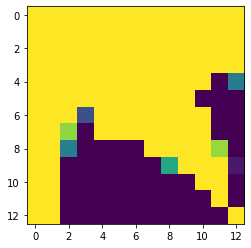

In [16]:
plt.imshow(push_fold_array)